In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [6]:
train = pd.read_csv('./train.csv')  # 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
test = pd.read_csv("./test.csv")
submission = pd.read_csv("./sample_submission.csv")

In [109]:
submission = pd.read_csv("./sample_submission.csv")

In [7]:
train.head() # 데이터 상위 5개를 확인합니다.

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [8]:
train.shape # 데이터를 모양을 확인합니다.

(1253, 10)

In [9]:
test.shape

(2924, 9)

In [19]:
submission.shape

(2924, 2)

In [15]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [17]:
test.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [18]:
submission.head()

,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [10]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30
plt.rcParams["font.family"] = "NanumGothic"


In [12]:
#결측치 있는지 확인하는 함수

def check_missing_col(dataframe):
    
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
            missing_col.append([col, dataframe[col].dtype])
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

    return missing_col

check_missing_col(train)


결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다


[]

In [13]:
check_missing_col(test)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다


[]

In [14]:
train = train.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.
test = test.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.

In [8]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [9]:
temp = train['Target'].unique() # Target의 중복되지 않은 값을 출력합니다.
np.sort(temp) # 오름차순으로 정렬합니다.

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29], dtype=int64)

In [10]:
train.groupby('Target').count().iloc[:,0] # Target 값 별로 데이터의 개수를 세어줍니다.

Target
3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

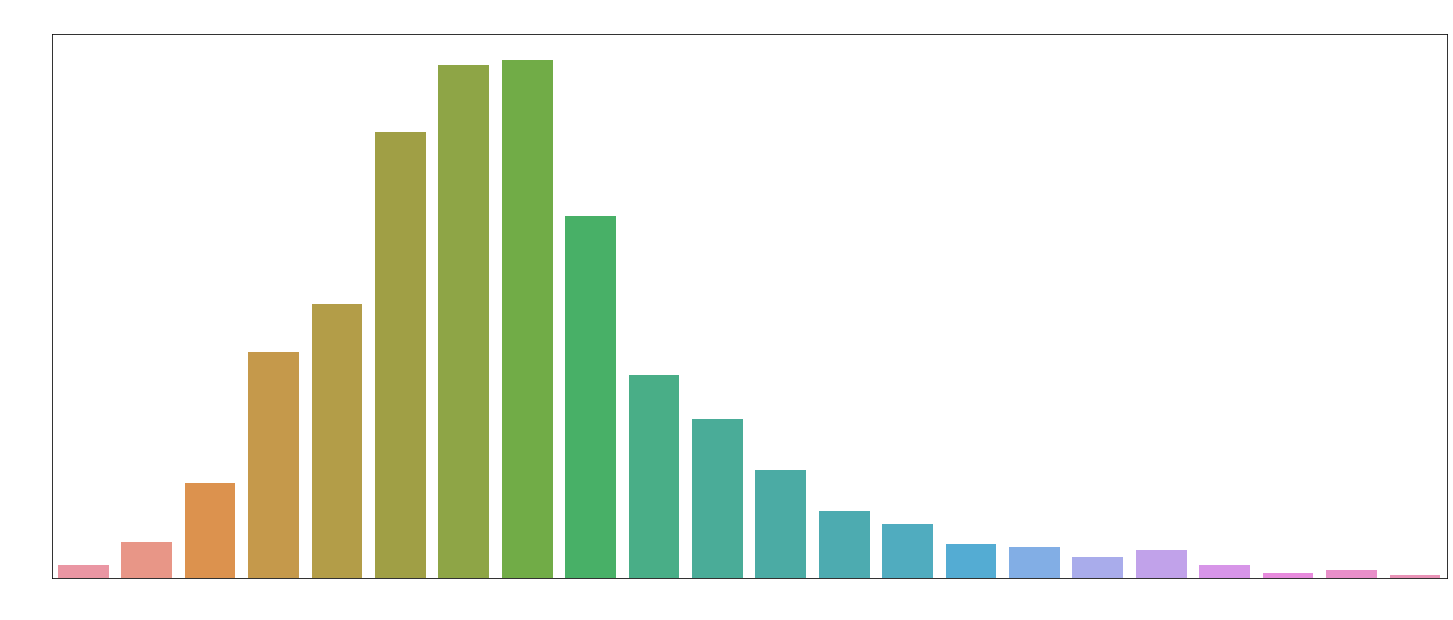

In [13]:
# 전복의 나이 분포 시각화
plt.rcParams["figure.figsize"] = [25,10]
sns.countplot("Target", data = train)
plt.title("전복 나이 별 카운트", fontsize = 30)
plt.xlabel("target(age)", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.show()

In [14]:
temp1 = train["Target"] == 29
temp2 = train["Target"] == 23
train[temp1 | temp2] # 가장 나이가 많은 29세와 23세의 데이터 프레임을 합침

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
553,F,0.45,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
762,F,0.70,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
1131,F,0.55,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1234,F,0.49,0.385,0.150,0.7865,0.2410,0.1400,0.240,23


In [15]:
train[train["Target"] == 3] # 가장 나이가 작은 3세의 데이터 프레임

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
20,M,0.155,0.11,0.040,0.0155,0.0065,0.003,0.005,3
210,I,0.195,0.15,0.045,0.0375,0.0180,0.006,0.011,3
285,I,0.130,0.10,0.030,0.0130,0.0045,0.003,0.004,3
463,I,0.110,0.09,0.030,0.0080,0.0025,0.002,0.003,3
1013,I,0.180,0.13,0.045,0.0275,0.0125,0.010,0.009,3


In [42]:
train["Gender"].value_counts()

M    469
I    404
F    380
Name: Gender, dtype: int64

In [43]:
test["Gender"].value_counts()

M    1059
I     938
F     927
Name: Gender, dtype: int64

In [ ]:
t

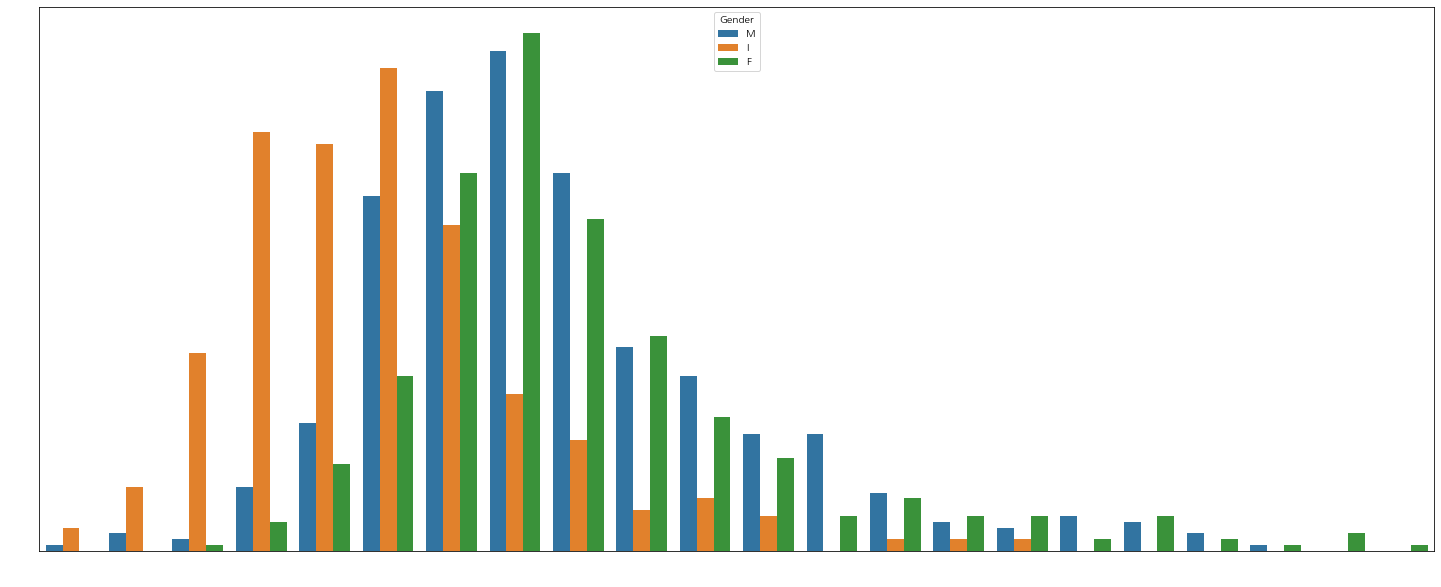

In [41]:
plt.figure(figsize = (25,10))
sns.countplot(x = "Target", hue = "Gender", data = train)
plt.show()

# 데이터 프레임 상으로도 23,29세에 비하여 3세의 전복이 전반적으로 수치가 낮음
# 또한 Gender가 23, 29세인 전복이 모두 F


In [16]:
train.dtypes

Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

In [17]:
print(train['Gender'].unique()) # Gender의 중복되지 않은 값을 출력합니다.

['M' 'I' 'F']


In [19]:
train.groupby(["Gender"]).count()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Gender,,,,,,,,
F,380,380,380,380,380,380,380,380
I,404,404,404,404,404,404,404,404
M,469,469,469,469,469,469,469,469


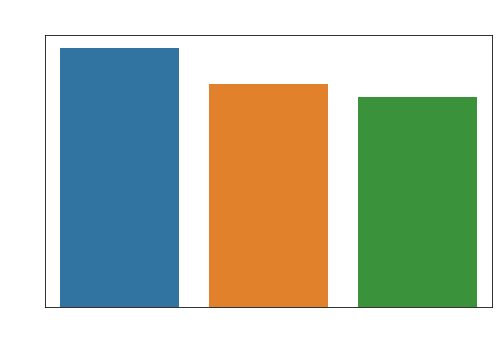

In [47]:
# 성별 데이터 개수 그래프
plt.rcParams["figure.figsize"] = [8,5]
sns.countplot("Gender", data = train)
plt.title("성별 데이터 개수 - train",fontsize=30)
plt.show()

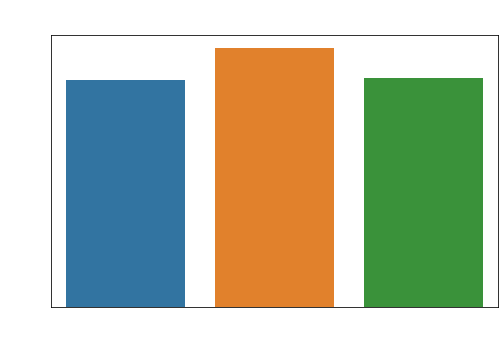

In [48]:
# 성별 데이터 개수 그래프
plt.rcParams["figure.figsize"] = [8,5]
sns.countplot("Gender", data = test)
plt.title("성별 데이터 개수 - test",fontsize=30)
plt.show()

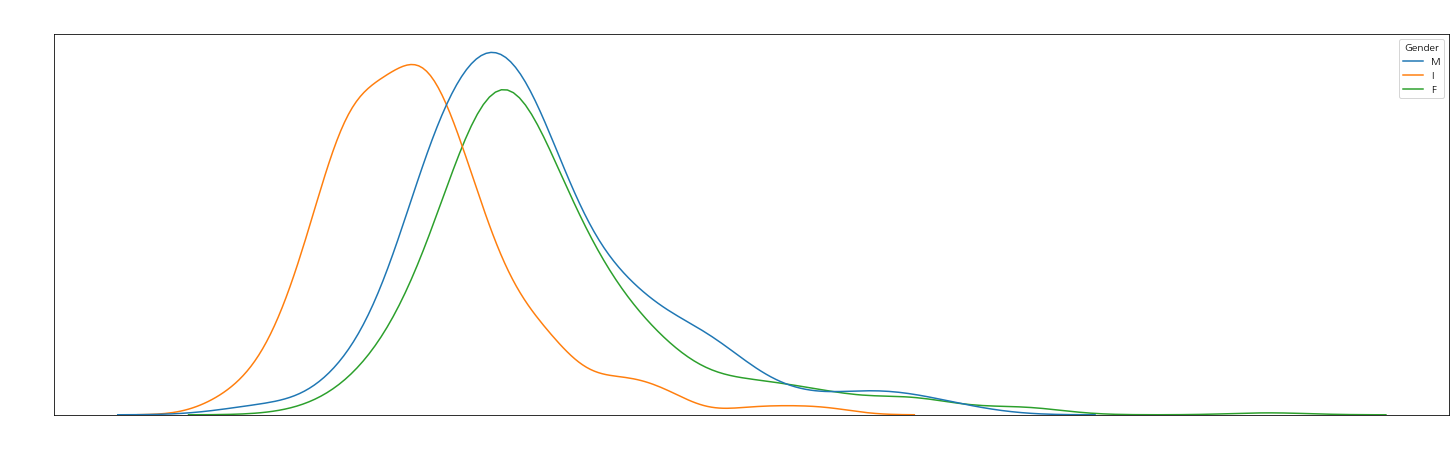

In [28]:
# 성별에 따른 나이 분포 그래프
plt.figure(figsize = (25,7))
sns.kdeplot("Target", hue = "Gender", data= train)
plt.title("성별에 따른 나이 분포", fontsize = 30)
plt.xlabel("target(Age)", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.show()

In [49]:
def corr_heatmap(data):

    # 상관계수그래프
    # 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
    from sklearn.preprocessing import LabelEncoder
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    corr_df = data.copy()
    corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

    # 상관관계 분석도
    plt.figure(figsize=(15,10))

    heat_table = corr_df.corr()
    mask = np.zeros_like(heat_table)
    mask[np.triu_indices_from(mask)] = True
    heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
    heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
    heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
    plt.title('correlation between features', fontsize=40)
    plt.show()

In [52]:
train_pre = train.copy()
test_pre = test.copy()
train_pre = pd.get_dummies(train_pre)
test_pre  = pd.get_dummies(test_pre)

In [54]:
train_pre.columns

Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target', 'Gender_F', 'Gender_I',
       'Gender_M'],
      dtype='object')

In [62]:
train_pre = train_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight","Target"]]
test_pre = test_pre[["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight"]]

# Gender  : 전복 성별
# Length : 전복 길이
# Diameter : 전복 둘레
# Height : 전복 키
# Whole Weight : 전복 전체 무게 = shucked weight + viscra weight + shell weight
# Shucked Weight : 껍질을 제외한 무게
# Viscra Weight : 내장 무게
# Shell Weight : 껍질 무게

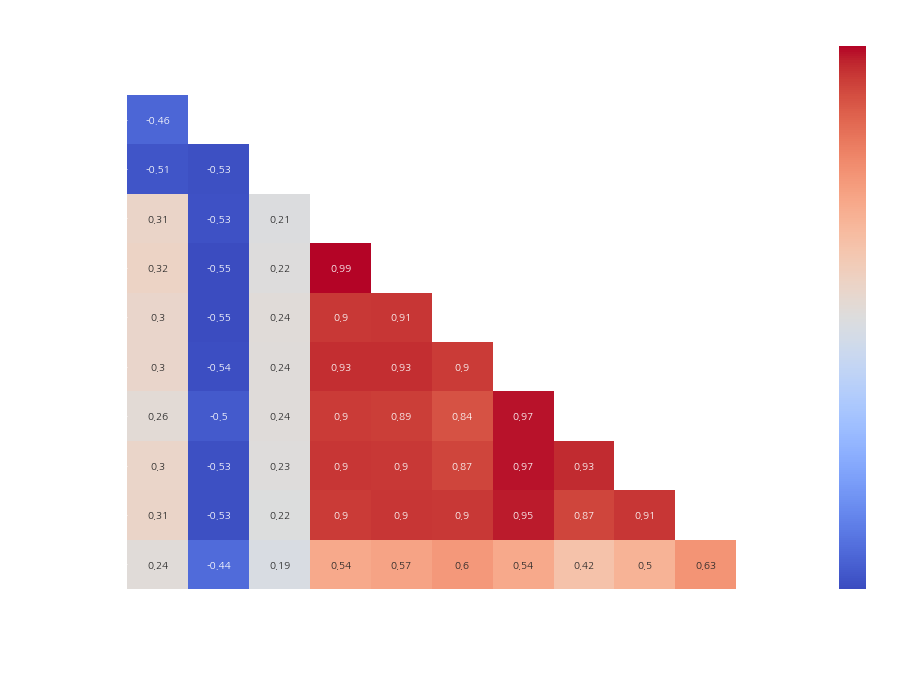

In [63]:
corr_heatmap(train_pre)

In [83]:
train_pre.head()

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,0,0,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0,1,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


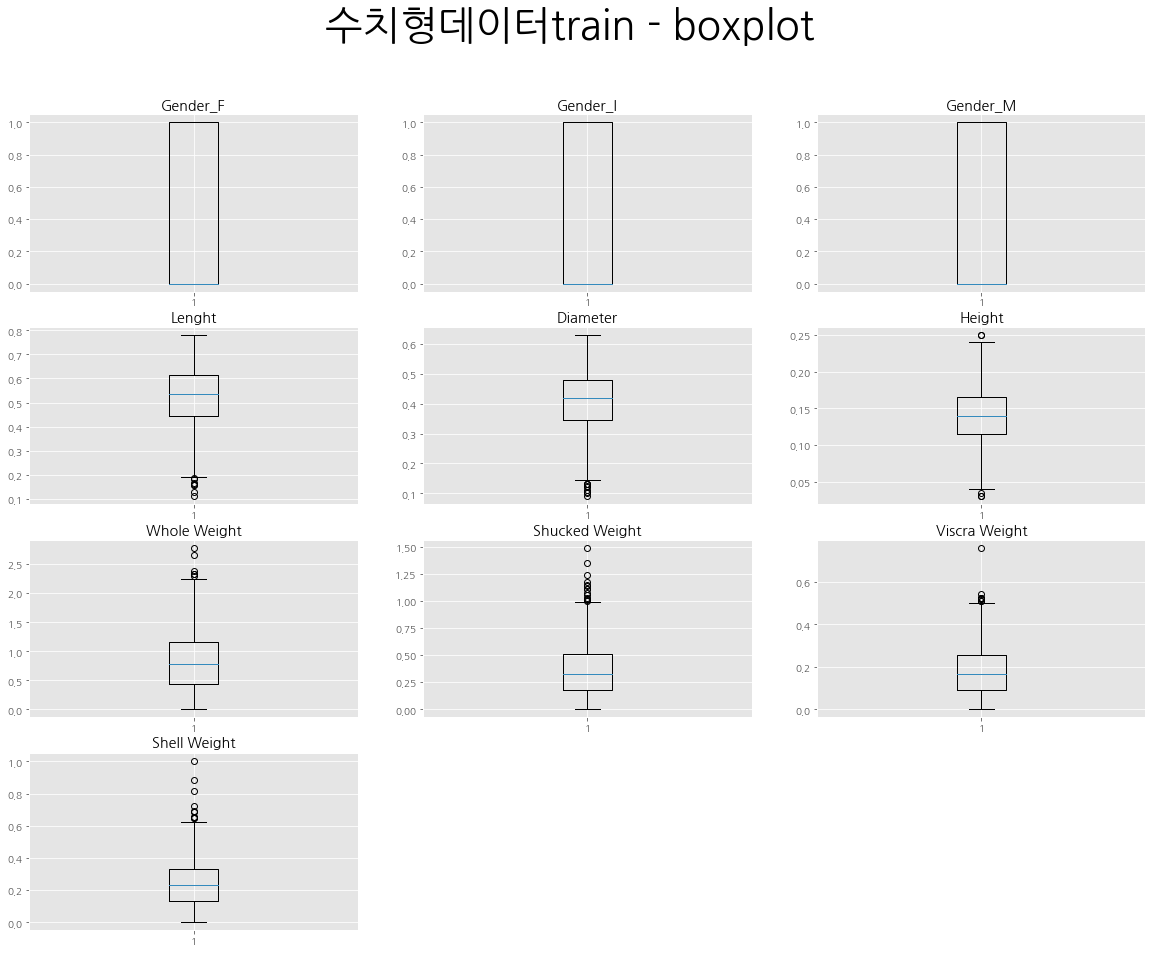

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = ["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight"]

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터train - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i], color = "black")
    plt.boxplot(train_pre[feature[i]])
plt.show()

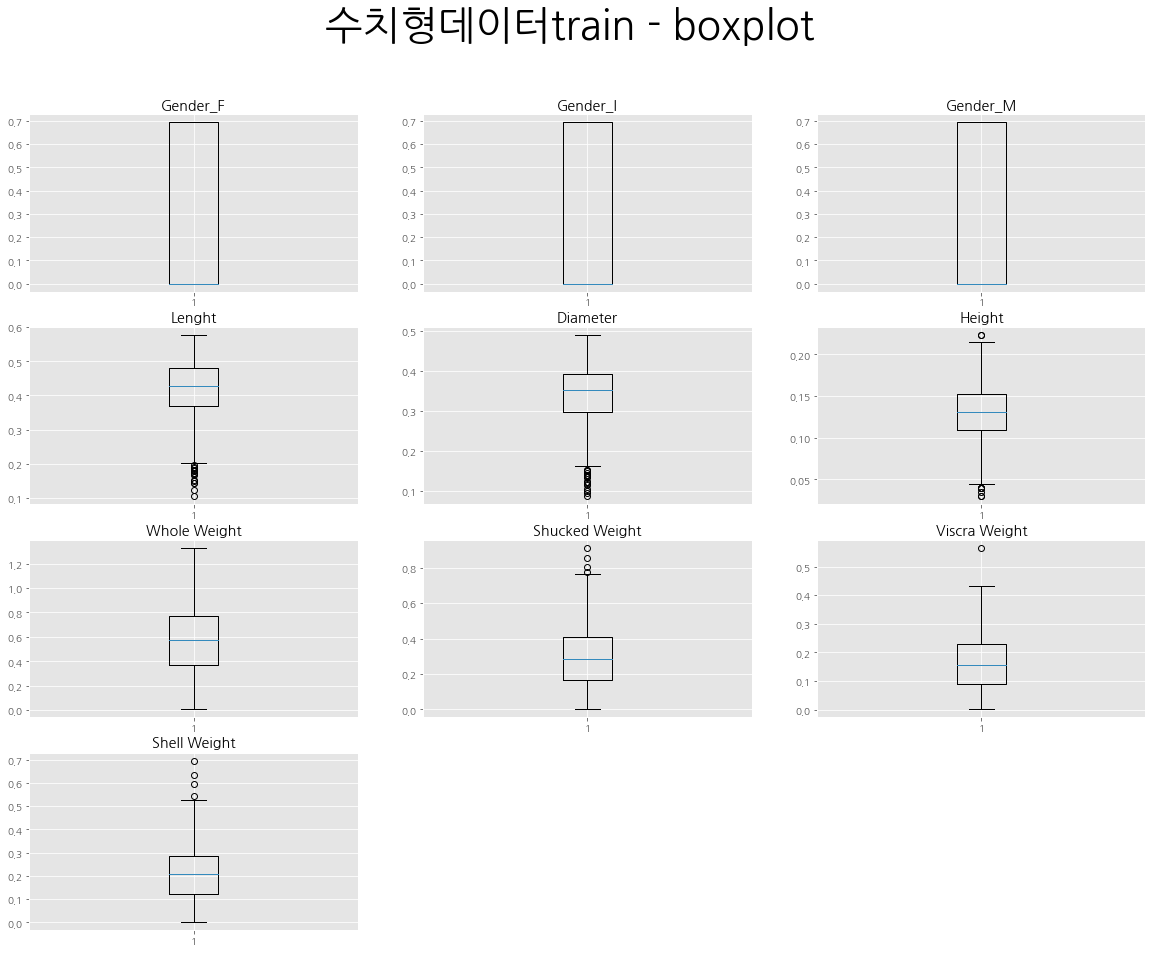

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = ["Gender_F","Gender_I","Gender_M","Lenght","Diameter","Height","Whole Weight","Shucked Weight","Viscra Weight","Shell Weight"]

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터train - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i], color = "black")
    plt.boxplot(np.log1p(train_pre[feature[i]]))
plt.show()

## 이변량 분석 - 길이, 둘레, 키, 무게 vs Target

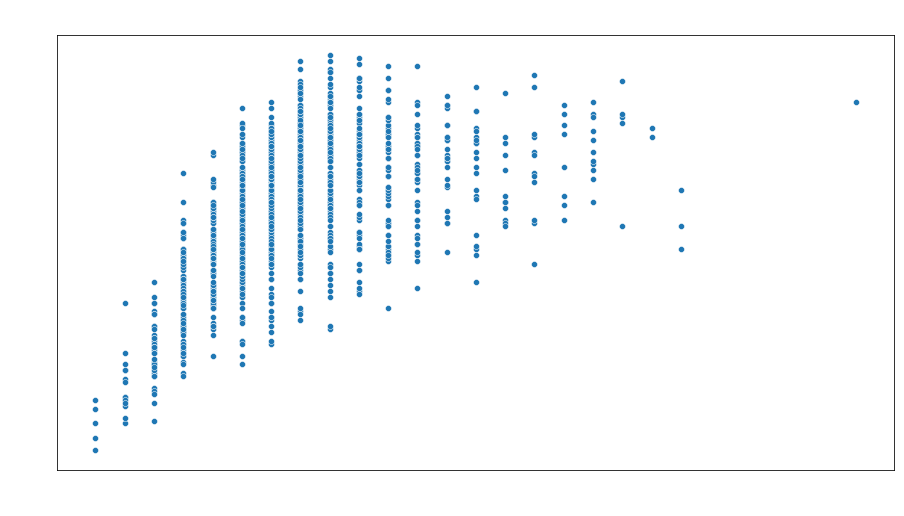

In [86]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Lenght", data = train_pre)
plt.title("Length vs Target", size = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

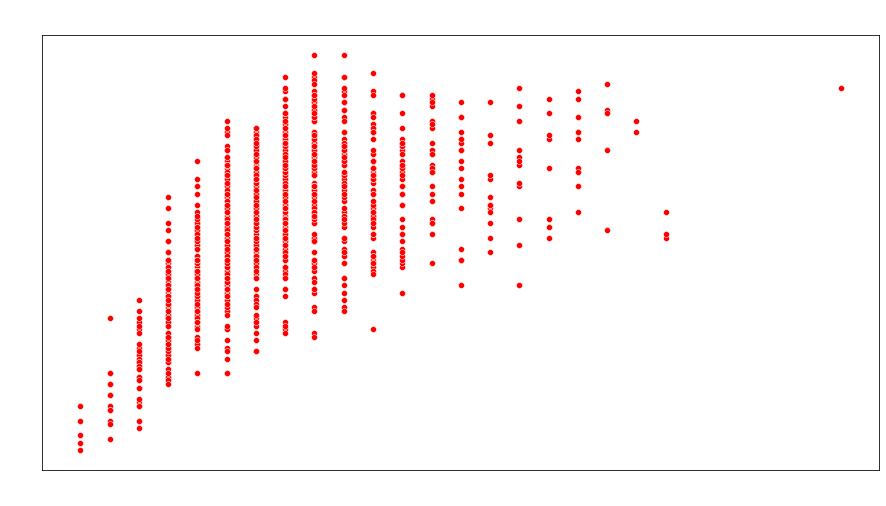

In [75]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Diameter", data = train_pre, color = "red")
plt.title("Diameter vs Target", size = 30)
plt.show()

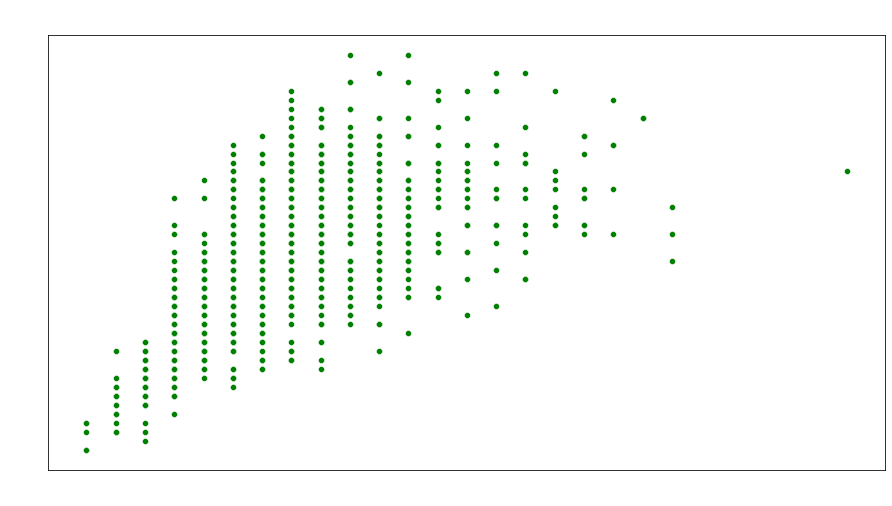

In [76]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Height", data = train_pre, color = "green")
plt.title("Height vs Target", size = 30)
plt.show()

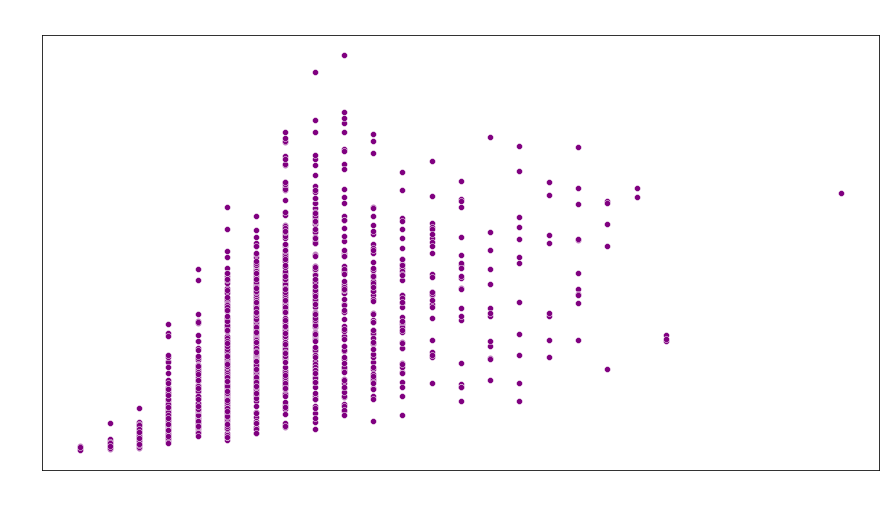

In [82]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "Target", y = "Whole Weight", data = train_pre, color = "purple")
plt.title("Weight vs Target", size = 30)
plt.show()

In [65]:
train_pre.head()

,Gender_F,Gender_I,Gender_M,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0,0,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,0,1,0,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,0,1,0,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,0,0,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,0,1,0,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [93]:
train_pre.groupby(["Target"])[["Lenght","Diameter","Height","Whole Weight"]].min()

,Lenght,Diameter,Height,Whole Weight
Target,,,,
3,0.110,0.090,0.030,0.0080
4,0.155,0.105,0.040,0.0175
5,0.160,0.120,0.035,0.0210
6,0.235,0.180,0.050,0.0580
7,0.270,0.195,0.070,0.1060
8,0.255,0.195,0.065,0.0800
9,0.290,0.225,0.075,0.1240
10,0.330,0.250,0.080,0.1690
11,0.315,0.245,0.075,0.1555


In [120]:
data_description = train.describe()
data_description

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


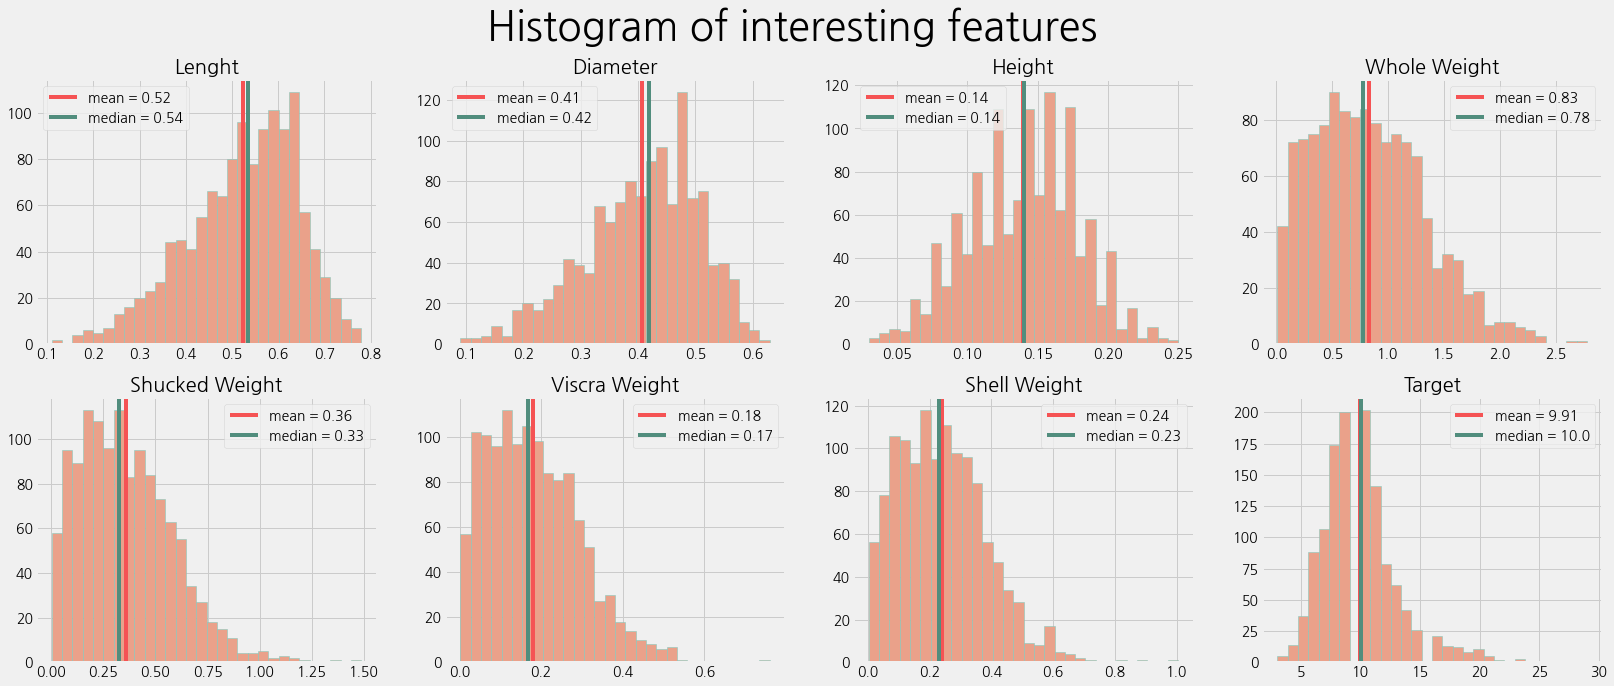

In [121]:
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'

# 수치형 데이터 통계치 그래프
interest_coloumns = train.columns[1:]
plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(2, 4, figsize = (25, 10))
fig.suptitle('Histogram of interesting features', fontsize=40)
column_idx = 0
for i in range(2):
    for j in range(4):
        ax[i][j].hist(train[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[column_idx])
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[interest_coloumns[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_coloumns[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        column_idx += 1

In [122]:
print('전복의 평균 나이는', round(data_description[interest_coloumns[7]]['mean'],1), '입니다') #round를 하여 소수점 1의 자리까지 반올림 하였습니다.

전복의 평균 나이는 9.9 입니다


# 모델링

In [131]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [132]:
#nmae_score = make_scorer(NMAE, greater_is_better=False)
kf = KFold(n_splits = 2, random_state = 42, shuffle = True)

In [143]:
def get_avg_NAME_cv(models):
    
    for model in models:
        
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행
        mae_avg = np.mean(-cross_val_score(model, X_data, y_target, scoring = "neg_mean_absolute_error", cv = 5 ))
        NMAE_avg = mae_avg / np.mean(np.abs(y_target))
        
        print("\n{0} CV 평균 NMAE 값 : {1}".format(model.__class__.__name__, np.round(NMAE_avg,3)))
        
        #return NMAE_avg

In [144]:
#models = [ridge, lasso, linear, cat_reg, ngb_reg, gb_reg, rf_reg, dt_reg, xgb_reg, lgbm_reg]
models = [Cat_reg]

get_avg_NAME_cv(models)

Learning rate set to 0.040956
0:	learn: 3.2373802	total: 1.49ms	remaining: 1.49s
1:	learn: 3.1939157	total: 3.21ms	remaining: 1.6s
2:	learn: 3.1508117	total: 4.57ms	remaining: 1.52s
3:	learn: 3.1087188	total: 5.93ms	remaining: 1.48s
4:	learn: 3.0737583	total: 7.09ms	remaining: 1.41s
5:	learn: 3.0358124	total: 8.28ms	remaining: 1.37s
6:	learn: 3.0033240	total: 9.48ms	remaining: 1.34s
7:	learn: 2.9686491	total: 10.6ms	remaining: 1.32s
8:	learn: 2.9380409	total: 11.9ms	remaining: 1.31s
9:	learn: 2.9126123	total: 12.9ms	remaining: 1.27s
10:	learn: 2.8868804	total: 14.1ms	remaining: 1.27s
11:	learn: 2.8613969	total: 15.5ms	remaining: 1.27s
12:	learn: 2.8339697	total: 16.7ms	remaining: 1.26s
13:	learn: 2.8106111	total: 17.9ms	remaining: 1.26s
14:	learn: 2.7879531	total: 19.1ms	remaining: 1.25s
15:	learn: 2.7660334	total: 20.4ms	remaining: 1.26s
16:	learn: 2.7448563	total: 21.6ms	remaining: 1.25s
17:	learn: 2.7255380	total: 22.8ms	remaining: 1.24s
18:	learn: 2.7056650	total: 24ms	remaining: 1

264:	learn: 1.7731961	total: 327ms	remaining: 906ms
265:	learn: 1.7692974	total: 328ms	remaining: 906ms
266:	learn: 1.7685989	total: 329ms	remaining: 904ms
267:	learn: 1.7659065	total: 331ms	remaining: 903ms
268:	learn: 1.7642308	total: 332ms	remaining: 901ms
269:	learn: 1.7618212	total: 333ms	remaining: 901ms
270:	learn: 1.7595147	total: 334ms	remaining: 900ms
271:	learn: 1.7568632	total: 336ms	remaining: 898ms
272:	learn: 1.7553858	total: 337ms	remaining: 897ms
273:	learn: 1.7516543	total: 338ms	remaining: 896ms
274:	learn: 1.7508766	total: 339ms	remaining: 894ms
275:	learn: 1.7489372	total: 341ms	remaining: 893ms
276:	learn: 1.7455183	total: 342ms	remaining: 893ms
277:	learn: 1.7432059	total: 344ms	remaining: 892ms
278:	learn: 1.7422655	total: 345ms	remaining: 891ms
279:	learn: 1.7417201	total: 346ms	remaining: 890ms
280:	learn: 1.7395204	total: 347ms	remaining: 889ms
281:	learn: 1.7383540	total: 349ms	remaining: 887ms
282:	learn: 1.7355806	total: 350ms	remaining: 886ms
283:	learn: 

531:	learn: 1.4169554	total: 662ms	remaining: 583ms
532:	learn: 1.4161980	total: 664ms	remaining: 582ms
533:	learn: 1.4149566	total: 665ms	remaining: 581ms
534:	learn: 1.4129588	total: 667ms	remaining: 579ms
535:	learn: 1.4128408	total: 668ms	remaining: 578ms
536:	learn: 1.4122840	total: 669ms	remaining: 577ms
537:	learn: 1.4115675	total: 670ms	remaining: 576ms
538:	learn: 1.4104357	total: 671ms	remaining: 574ms
539:	learn: 1.4095383	total: 673ms	remaining: 573ms
540:	learn: 1.4085345	total: 674ms	remaining: 572ms
541:	learn: 1.4073864	total: 675ms	remaining: 570ms
542:	learn: 1.4059961	total: 676ms	remaining: 569ms
543:	learn: 1.4048775	total: 678ms	remaining: 568ms
544:	learn: 1.4045963	total: 679ms	remaining: 567ms
545:	learn: 1.4024436	total: 680ms	remaining: 565ms
546:	learn: 1.4003069	total: 681ms	remaining: 564ms
547:	learn: 1.3984479	total: 683ms	remaining: 563ms
548:	learn: 1.3972968	total: 684ms	remaining: 562ms
549:	learn: 1.3966069	total: 686ms	remaining: 561ms
550:	learn: 

780:	learn: 1.1917335	total: 997ms	remaining: 279ms
781:	learn: 1.1904467	total: 998ms	remaining: 278ms
782:	learn: 1.1893683	total: 999ms	remaining: 277ms
783:	learn: 1.1892267	total: 1s	remaining: 276ms
784:	learn: 1.1879749	total: 1s	remaining: 274ms
785:	learn: 1.1876221	total: 1s	remaining: 273ms
786:	learn: 1.1869390	total: 1s	remaining: 272ms
787:	learn: 1.1857329	total: 1s	remaining: 271ms
788:	learn: 1.1846103	total: 1.01s	remaining: 269ms
789:	learn: 1.1840365	total: 1.01s	remaining: 268ms
790:	learn: 1.1830072	total: 1.01s	remaining: 267ms
791:	learn: 1.1827619	total: 1.01s	remaining: 265ms
792:	learn: 1.1813699	total: 1.01s	remaining: 264ms
793:	learn: 1.1809770	total: 1.01s	remaining: 263ms
794:	learn: 1.1803351	total: 1.01s	remaining: 262ms
795:	learn: 1.1795800	total: 1.01s	remaining: 260ms
796:	learn: 1.1786192	total: 1.02s	remaining: 259ms
797:	learn: 1.1778405	total: 1.02s	remaining: 258ms
798:	learn: 1.1765674	total: 1.02s	remaining: 256ms
799:	learn: 1.1765288	total

1:	learn: 3.1728130	total: 3.45ms	remaining: 1.72s
2:	learn: 3.1296981	total: 4.99ms	remaining: 1.66s
3:	learn: 3.0862414	total: 6.4ms	remaining: 1.59s
4:	learn: 3.0420734	total: 7.88ms	remaining: 1.57s
5:	learn: 3.0036373	total: 9.21ms	remaining: 1.52s
6:	learn: 2.9690308	total: 10.6ms	remaining: 1.5s
7:	learn: 2.9349823	total: 11.8ms	remaining: 1.47s
8:	learn: 2.9038904	total: 13.3ms	remaining: 1.46s
9:	learn: 2.8730252	total: 15ms	remaining: 1.49s
10:	learn: 2.8467298	total: 16.3ms	remaining: 1.46s
11:	learn: 2.8193157	total: 17.9ms	remaining: 1.47s
12:	learn: 2.7901788	total: 19.1ms	remaining: 1.45s
13:	learn: 2.7668144	total: 20.2ms	remaining: 1.43s
14:	learn: 2.7433848	total: 21.6ms	remaining: 1.42s
15:	learn: 2.7195899	total: 23.2ms	remaining: 1.43s
16:	learn: 2.7007950	total: 24.6ms	remaining: 1.42s
17:	learn: 2.6814101	total: 25.9ms	remaining: 1.41s
18:	learn: 2.6638822	total: 26.9ms	remaining: 1.39s
19:	learn: 2.6423825	total: 28.2ms	remaining: 1.38s
20:	learn: 2.6304845	tota

258:	learn: 1.7716801	total: 338ms	remaining: 968ms
259:	learn: 1.7704414	total: 340ms	remaining: 967ms
260:	learn: 1.7694668	total: 341ms	remaining: 965ms
261:	learn: 1.7684478	total: 342ms	remaining: 964ms
262:	learn: 1.7655856	total: 343ms	remaining: 962ms
263:	learn: 1.7630929	total: 345ms	remaining: 961ms
264:	learn: 1.7622093	total: 346ms	remaining: 959ms
265:	learn: 1.7614561	total: 347ms	remaining: 958ms
266:	learn: 1.7584179	total: 348ms	remaining: 956ms
267:	learn: 1.7553677	total: 349ms	remaining: 954ms
268:	learn: 1.7548891	total: 351ms	remaining: 953ms
269:	learn: 1.7503799	total: 352ms	remaining: 951ms
270:	learn: 1.7495237	total: 354ms	remaining: 951ms
271:	learn: 1.7472690	total: 355ms	remaining: 950ms
272:	learn: 1.7446714	total: 357ms	remaining: 949ms
273:	learn: 1.7439037	total: 358ms	remaining: 948ms
274:	learn: 1.7401357	total: 359ms	remaining: 946ms
275:	learn: 1.7390100	total: 360ms	remaining: 945ms
276:	learn: 1.7369899	total: 361ms	remaining: 943ms
277:	learn: 

528:	learn: 1.3821585	total: 674ms	remaining: 600ms
529:	learn: 1.3810697	total: 676ms	remaining: 599ms
530:	learn: 1.3805941	total: 677ms	remaining: 598ms
531:	learn: 1.3789177	total: 678ms	remaining: 597ms
532:	learn: 1.3784263	total: 680ms	remaining: 596ms
533:	learn: 1.3765464	total: 681ms	remaining: 594ms
534:	learn: 1.3753491	total: 682ms	remaining: 593ms
535:	learn: 1.3745735	total: 683ms	remaining: 591ms
536:	learn: 1.3727675	total: 684ms	remaining: 590ms
537:	learn: 1.3708240	total: 686ms	remaining: 589ms
538:	learn: 1.3693810	total: 687ms	remaining: 588ms
539:	learn: 1.3687915	total: 688ms	remaining: 586ms
540:	learn: 1.3687469	total: 689ms	remaining: 585ms
541:	learn: 1.3675869	total: 691ms	remaining: 584ms
542:	learn: 1.3666916	total: 692ms	remaining: 582ms
543:	learn: 1.3662459	total: 693ms	remaining: 581ms
544:	learn: 1.3649826	total: 695ms	remaining: 580ms
545:	learn: 1.3637143	total: 696ms	remaining: 579ms
546:	learn: 1.3621399	total: 697ms	remaining: 578ms
547:	learn: 

787:	learn: 1.1569530	total: 1.01s	remaining: 272ms
788:	learn: 1.1559138	total: 1.01s	remaining: 271ms
789:	learn: 1.1553180	total: 1.01s	remaining: 269ms
790:	learn: 1.1549468	total: 1.01s	remaining: 268ms
791:	learn: 1.1540372	total: 1.01s	remaining: 267ms
792:	learn: 1.1537936	total: 1.02s	remaining: 265ms
793:	learn: 1.1530055	total: 1.02s	remaining: 264ms
794:	learn: 1.1525246	total: 1.02s	remaining: 263ms
795:	learn: 1.1524807	total: 1.02s	remaining: 262ms
796:	learn: 1.1518971	total: 1.02s	remaining: 260ms
797:	learn: 1.1516966	total: 1.02s	remaining: 259ms
798:	learn: 1.1511955	total: 1.02s	remaining: 258ms
799:	learn: 1.1499522	total: 1.02s	remaining: 256ms
800:	learn: 1.1497089	total: 1.03s	remaining: 255ms
801:	learn: 1.1480046	total: 1.03s	remaining: 254ms
802:	learn: 1.1462331	total: 1.03s	remaining: 253ms
803:	learn: 1.1457820	total: 1.03s	remaining: 251ms
804:	learn: 1.1446708	total: 1.03s	remaining: 250ms
805:	learn: 1.1431497	total: 1.03s	remaining: 249ms
806:	learn: 

21:	learn: 2.5742941	total: 28.9ms	remaining: 1.28s
22:	learn: 2.5571874	total: 30.5ms	remaining: 1.29s
23:	learn: 2.5435892	total: 32.1ms	remaining: 1.31s
24:	learn: 2.5308741	total: 33.5ms	remaining: 1.31s
25:	learn: 2.5173925	total: 34.9ms	remaining: 1.31s
26:	learn: 2.5030336	total: 36ms	remaining: 1.3s
27:	learn: 2.4912443	total: 37.4ms	remaining: 1.3s
28:	learn: 2.4809860	total: 38.8ms	remaining: 1.3s
29:	learn: 2.4668503	total: 40.5ms	remaining: 1.31s
30:	learn: 2.4551986	total: 41.8ms	remaining: 1.3s
31:	learn: 2.4431460	total: 43.2ms	remaining: 1.31s
32:	learn: 2.4307803	total: 44.5ms	remaining: 1.3s
33:	learn: 2.4218007	total: 46ms	remaining: 1.3s
34:	learn: 2.4133077	total: 47.2ms	remaining: 1.3s
35:	learn: 2.4033175	total: 48.4ms	remaining: 1.29s
36:	learn: 2.3960611	total: 50.2ms	remaining: 1.3s
37:	learn: 2.3853888	total: 51.8ms	remaining: 1.31s
38:	learn: 2.3777553	total: 53.3ms	remaining: 1.31s
39:	learn: 2.3690373	total: 54.5ms	remaining: 1.31s
40:	learn: 2.3618951	tot

281:	learn: 1.6690032	total: 365ms	remaining: 929ms
282:	learn: 1.6672144	total: 366ms	remaining: 927ms
283:	learn: 1.6657393	total: 367ms	remaining: 926ms
284:	learn: 1.6642747	total: 368ms	remaining: 924ms
285:	learn: 1.6629976	total: 370ms	remaining: 923ms
286:	learn: 1.6623391	total: 371ms	remaining: 922ms
287:	learn: 1.6605624	total: 372ms	remaining: 921ms
288:	learn: 1.6582088	total: 374ms	remaining: 919ms
289:	learn: 1.6560321	total: 375ms	remaining: 918ms
290:	learn: 1.6554547	total: 376ms	remaining: 916ms
291:	learn: 1.6538735	total: 377ms	remaining: 915ms
292:	learn: 1.6532018	total: 379ms	remaining: 913ms
293:	learn: 1.6508644	total: 380ms	remaining: 912ms
294:	learn: 1.6491221	total: 381ms	remaining: 911ms
295:	learn: 1.6485004	total: 382ms	remaining: 910ms
296:	learn: 1.6465844	total: 395ms	remaining: 935ms
297:	learn: 1.6443254	total: 397ms	remaining: 935ms
298:	learn: 1.6413330	total: 398ms	remaining: 933ms
299:	learn: 1.6400342	total: 400ms	remaining: 933ms
300:	learn: 

536:	learn: 1.3221688	total: 702ms	remaining: 605ms
537:	learn: 1.3215704	total: 704ms	remaining: 604ms
538:	learn: 1.3207634	total: 705ms	remaining: 603ms
539:	learn: 1.3190163	total: 706ms	remaining: 601ms
540:	learn: 1.3174616	total: 707ms	remaining: 600ms
541:	learn: 1.3165090	total: 708ms	remaining: 599ms
542:	learn: 1.3160254	total: 710ms	remaining: 597ms
543:	learn: 1.3145768	total: 711ms	remaining: 596ms
544:	learn: 1.3130550	total: 712ms	remaining: 595ms
545:	learn: 1.3115756	total: 714ms	remaining: 593ms
546:	learn: 1.3102803	total: 715ms	remaining: 592ms
547:	learn: 1.3086586	total: 716ms	remaining: 591ms
548:	learn: 1.3086193	total: 717ms	remaining: 589ms
549:	learn: 1.3084966	total: 718ms	remaining: 588ms
550:	learn: 1.3084500	total: 719ms	remaining: 586ms
551:	learn: 1.3074061	total: 721ms	remaining: 585ms
552:	learn: 1.3060408	total: 722ms	remaining: 584ms
553:	learn: 1.3055691	total: 724ms	remaining: 583ms
554:	learn: 1.3046768	total: 725ms	remaining: 581ms
555:	learn: 

808:	learn: 1.0931984	total: 1.04s	remaining: 245ms
809:	learn: 1.0926604	total: 1.04s	remaining: 244ms
810:	learn: 1.0916142	total: 1.04s	remaining: 243ms
811:	learn: 1.0909983	total: 1.04s	remaining: 241ms
812:	learn: 1.0898470	total: 1.04s	remaining: 240ms
813:	learn: 1.0896152	total: 1.04s	remaining: 239ms
814:	learn: 1.0894137	total: 1.05s	remaining: 237ms
815:	learn: 1.0891088	total: 1.05s	remaining: 236ms
816:	learn: 1.0885122	total: 1.05s	remaining: 235ms
817:	learn: 1.0867837	total: 1.05s	remaining: 234ms
818:	learn: 1.0862910	total: 1.05s	remaining: 232ms
819:	learn: 1.0855204	total: 1.05s	remaining: 231ms
820:	learn: 1.0850490	total: 1.05s	remaining: 230ms
821:	learn: 1.0846813	total: 1.05s	remaining: 228ms
822:	learn: 1.0838787	total: 1.06s	remaining: 227ms
823:	learn: 1.0823187	total: 1.06s	remaining: 226ms
824:	learn: 1.0819342	total: 1.06s	remaining: 225ms
825:	learn: 1.0814408	total: 1.06s	remaining: 223ms
826:	learn: 1.0808709	total: 1.06s	remaining: 222ms
827:	learn: 

42:	learn: 2.3779235	total: 59ms	remaining: 1.31s
43:	learn: 2.3716714	total: 60.7ms	remaining: 1.32s
44:	learn: 2.3635181	total: 62.4ms	remaining: 1.32s
45:	learn: 2.3555796	total: 63.6ms	remaining: 1.32s
46:	learn: 2.3502187	total: 65ms	remaining: 1.32s
47:	learn: 2.3432866	total: 66.4ms	remaining: 1.32s
48:	learn: 2.3368613	total: 67.9ms	remaining: 1.32s
49:	learn: 2.3354435	total: 68.4ms	remaining: 1.3s
50:	learn: 2.3289834	total: 70.1ms	remaining: 1.3s
51:	learn: 2.3207306	total: 71.6ms	remaining: 1.3s
52:	learn: 2.3155901	total: 73.1ms	remaining: 1.3s
53:	learn: 2.3110872	total: 74.4ms	remaining: 1.3s
54:	learn: 2.3040388	total: 75.7ms	remaining: 1.3s
55:	learn: 2.2967874	total: 77ms	remaining: 1.3s
56:	learn: 2.2927403	total: 78.5ms	remaining: 1.3s
57:	learn: 2.2871657	total: 80.2ms	remaining: 1.3s
58:	learn: 2.2805308	total: 81.5ms	remaining: 1.3s
59:	learn: 2.2740032	total: 83ms	remaining: 1.3s
60:	learn: 2.2678718	total: 84.2ms	remaining: 1.3s
61:	learn: 2.2630177	total: 85.5

303:	learn: 1.6894539	total: 394ms	remaining: 902ms
304:	learn: 1.6888411	total: 395ms	remaining: 901ms
305:	learn: 1.6882596	total: 396ms	remaining: 899ms
306:	learn: 1.6857088	total: 398ms	remaining: 898ms
307:	learn: 1.6853432	total: 399ms	remaining: 896ms
308:	learn: 1.6839173	total: 400ms	remaining: 895ms
309:	learn: 1.6831483	total: 402ms	remaining: 894ms
310:	learn: 1.6822750	total: 403ms	remaining: 892ms
311:	learn: 1.6804609	total: 404ms	remaining: 891ms
312:	learn: 1.6776399	total: 405ms	remaining: 889ms
313:	learn: 1.6741536	total: 406ms	remaining: 888ms
314:	learn: 1.6715269	total: 408ms	remaining: 887ms
315:	learn: 1.6711673	total: 409ms	remaining: 886ms
316:	learn: 1.6707895	total: 411ms	remaining: 885ms
317:	learn: 1.6694736	total: 412ms	remaining: 884ms
318:	learn: 1.6677533	total: 413ms	remaining: 882ms
319:	learn: 1.6654099	total: 415ms	remaining: 881ms
320:	learn: 1.6639996	total: 416ms	remaining: 879ms
321:	learn: 1.6609972	total: 417ms	remaining: 878ms
322:	learn: 

555:	learn: 1.3856915	total: 728ms	remaining: 582ms
556:	learn: 1.3853563	total: 730ms	remaining: 580ms
557:	learn: 1.3829845	total: 731ms	remaining: 579ms
558:	learn: 1.3809457	total: 732ms	remaining: 578ms
559:	learn: 1.3800129	total: 734ms	remaining: 577ms
560:	learn: 1.3793007	total: 735ms	remaining: 575ms
561:	learn: 1.3784596	total: 736ms	remaining: 574ms
562:	learn: 1.3781847	total: 738ms	remaining: 572ms
563:	learn: 1.3760471	total: 739ms	remaining: 571ms
564:	learn: 1.3758306	total: 741ms	remaining: 570ms
565:	learn: 1.3744904	total: 742ms	remaining: 569ms
566:	learn: 1.3741078	total: 743ms	remaining: 568ms
567:	learn: 1.3738981	total: 745ms	remaining: 567ms
568:	learn: 1.3708472	total: 746ms	remaining: 565ms
569:	learn: 1.3695870	total: 747ms	remaining: 564ms
570:	learn: 1.3695246	total: 749ms	remaining: 563ms
571:	learn: 1.3675625	total: 750ms	remaining: 561ms
572:	learn: 1.3658056	total: 752ms	remaining: 560ms
573:	learn: 1.3643200	total: 753ms	remaining: 559ms
574:	learn: 

820:	learn: 1.1709653	total: 1.06s	remaining: 232ms
821:	learn: 1.1708461	total: 1.06s	remaining: 230ms
822:	learn: 1.1704334	total: 1.06s	remaining: 229ms
823:	learn: 1.1698737	total: 1.07s	remaining: 228ms
824:	learn: 1.1696380	total: 1.07s	remaining: 226ms
825:	learn: 1.1692941	total: 1.07s	remaining: 225ms
826:	learn: 1.1690768	total: 1.07s	remaining: 224ms
827:	learn: 1.1688885	total: 1.07s	remaining: 223ms
828:	learn: 1.1688488	total: 1.07s	remaining: 221ms
829:	learn: 1.1688181	total: 1.07s	remaining: 220ms
830:	learn: 1.1672624	total: 1.07s	remaining: 219ms
831:	learn: 1.1657348	total: 1.08s	remaining: 217ms
832:	learn: 1.1645105	total: 1.08s	remaining: 216ms
833:	learn: 1.1639370	total: 1.08s	remaining: 215ms
834:	learn: 1.1618087	total: 1.08s	remaining: 214ms
835:	learn: 1.1614745	total: 1.08s	remaining: 212ms
836:	learn: 1.1614312	total: 1.08s	remaining: 211ms
837:	learn: 1.1606198	total: 1.08s	remaining: 210ms
838:	learn: 1.1604241	total: 1.08s	remaining: 208ms
839:	learn: 

24:	learn: 2.4097238	total: 69ms	remaining: 2.69s
25:	learn: 2.3976782	total: 70.5ms	remaining: 2.64s
26:	learn: 2.3847124	total: 71.8ms	remaining: 2.59s
27:	learn: 2.3739945	total: 73ms	remaining: 2.53s
28:	learn: 2.3652792	total: 74.2ms	remaining: 2.48s
29:	learn: 2.3532279	total: 75.5ms	remaining: 2.44s
30:	learn: 2.3440987	total: 76.7ms	remaining: 2.4s
31:	learn: 2.3335712	total: 78.1ms	remaining: 2.36s
32:	learn: 2.3246918	total: 79.2ms	remaining: 2.32s
33:	learn: 2.3135555	total: 80.5ms	remaining: 2.29s
34:	learn: 2.3047584	total: 81.9ms	remaining: 2.26s
35:	learn: 2.2959987	total: 83.1ms	remaining: 2.22s
36:	learn: 2.2909387	total: 84.3ms	remaining: 2.19s
37:	learn: 2.2800767	total: 85.5ms	remaining: 2.16s
38:	learn: 2.2730805	total: 86.7ms	remaining: 2.13s
39:	learn: 2.2629079	total: 87.9ms	remaining: 2.11s
40:	learn: 2.2567371	total: 89.2ms	remaining: 2.09s
41:	learn: 2.2501787	total: 90.8ms	remaining: 2.07s
42:	learn: 2.2408958	total: 92ms	remaining: 2.05s
43:	learn: 2.231872

289:	learn: 1.5945403	total: 405ms	remaining: 993ms
290:	learn: 1.5932218	total: 407ms	remaining: 991ms
291:	learn: 1.5923462	total: 408ms	remaining: 989ms
292:	learn: 1.5906496	total: 409ms	remaining: 987ms
293:	learn: 1.5890069	total: 410ms	remaining: 986ms
294:	learn: 1.5884047	total: 412ms	remaining: 984ms
295:	learn: 1.5863804	total: 413ms	remaining: 983ms
296:	learn: 1.5845752	total: 414ms	remaining: 981ms
297:	learn: 1.5830086	total: 416ms	remaining: 979ms
298:	learn: 1.5812571	total: 417ms	remaining: 978ms
299:	learn: 1.5794427	total: 418ms	remaining: 976ms
300:	learn: 1.5786721	total: 420ms	remaining: 975ms
301:	learn: 1.5770198	total: 421ms	remaining: 974ms
302:	learn: 1.5745120	total: 423ms	remaining: 972ms
303:	learn: 1.5737656	total: 424ms	remaining: 971ms
304:	learn: 1.5717634	total: 425ms	remaining: 969ms
305:	learn: 1.5702338	total: 427ms	remaining: 967ms
306:	learn: 1.5693929	total: 428ms	remaining: 965ms
307:	learn: 1.5678760	total: 429ms	remaining: 964ms
308:	learn: 

550:	learn: 1.2778147	total: 740ms	remaining: 603ms
551:	learn: 1.2772482	total: 741ms	remaining: 602ms
552:	learn: 1.2770791	total: 743ms	remaining: 601ms
553:	learn: 1.2759448	total: 745ms	remaining: 599ms
554:	learn: 1.2758118	total: 746ms	remaining: 598ms
555:	learn: 1.2756218	total: 747ms	remaining: 596ms
556:	learn: 1.2744612	total: 748ms	remaining: 595ms
557:	learn: 1.2728818	total: 749ms	remaining: 594ms
558:	learn: 1.2723761	total: 751ms	remaining: 592ms
559:	learn: 1.2721394	total: 752ms	remaining: 591ms
560:	learn: 1.2704527	total: 753ms	remaining: 590ms
561:	learn: 1.2696992	total: 755ms	remaining: 588ms
562:	learn: 1.2684410	total: 756ms	remaining: 587ms
563:	learn: 1.2680486	total: 757ms	remaining: 585ms
564:	learn: 1.2668709	total: 758ms	remaining: 584ms
565:	learn: 1.2656992	total: 760ms	remaining: 583ms
566:	learn: 1.2652078	total: 761ms	remaining: 581ms
567:	learn: 1.2640578	total: 763ms	remaining: 580ms
568:	learn: 1.2622420	total: 764ms	remaining: 579ms
569:	learn: 

807:	learn: 1.0606066	total: 1.08s	remaining: 256ms
808:	learn: 1.0602859	total: 1.08s	remaining: 255ms
809:	learn: 1.0601890	total: 1.08s	remaining: 253ms
810:	learn: 1.0590720	total: 1.08s	remaining: 252ms
811:	learn: 1.0589782	total: 1.08s	remaining: 251ms
812:	learn: 1.0585272	total: 1.08s	remaining: 249ms
813:	learn: 1.0578579	total: 1.08s	remaining: 248ms
814:	learn: 1.0571842	total: 1.09s	remaining: 247ms
815:	learn: 1.0570504	total: 1.09s	remaining: 245ms
816:	learn: 1.0564053	total: 1.09s	remaining: 244ms
817:	learn: 1.0555176	total: 1.09s	remaining: 242ms
818:	learn: 1.0553224	total: 1.09s	remaining: 241ms
819:	learn: 1.0541168	total: 1.09s	remaining: 240ms
820:	learn: 1.0526379	total: 1.09s	remaining: 239ms
821:	learn: 1.0508668	total: 1.09s	remaining: 237ms
822:	learn: 1.0500924	total: 1.1s	remaining: 236ms
823:	learn: 1.0485728	total: 1.1s	remaining: 234ms
824:	learn: 1.0481040	total: 1.1s	remaining: 233ms
825:	learn: 1.0477922	total: 1.1s	remaining: 232ms
826:	learn: 1.04

In [ ]:
def cross_validation_predict(model, X_data, y_target, test, n_split) :
    
    kf = KFold(n_splits = n_split, random_state = 42, shuffle = True )
    
    loss_list = []
    
    model_pred = np.zeros((test.shape[0]))
    
    for tr_idx, val_idx in kf.split(X_data, y_target) :
        
        tr_x, tr_y = X_data.iloc[tr_idx], y_target.iloc[tr_idx]
        val_x, val_y = X_data.iloc[val_idx], y_target.iloc[val_idx]
        
        
        model.fit(tr_x, tr_y)
        
        pred = model.predict(val_x)
        sub_pred = model.predict(test)
        nmae = NMAE(val_y, pred)
        
        loss_list.append(nmae)
        
        model_pred += (sub_pred / n_split)
        
    print("검증 nmae : ", np.mean(loss_list) )
    print(f"{model.__class__.__name__} 예측값 \n {model_pred}")
    
    return model_pred


In [142]:
X_train = train_pre.iloc[:,:-1]
y_train = train_pre["Target"]

X_test = test_pre


X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

X_data = X_train.copy()
y_target = y_train.copy()

In [94]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression # 릿지, 라쏘, 선형회귀
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.tree import DecisionTreeRegressor #의사결정회귀
from xgboost import XGBRegressor #XGB회귀
from lightgbm import LGBMRegressor #LGB회귀
from ngboost import NGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [124]:
Cat_reg = CatBoostRegressor()
Cat_reg.fit(X_train,y_train)
submission["Target"] = Cat_reg.predict(X_test)

Learning rate set to 0.042428
0:	learn: 3.1638355	total: 1.52ms	remaining: 1.52s
1:	learn: 3.1168176	total: 3.24ms	remaining: 1.61s
2:	learn: 3.0747941	total: 4.59ms	remaining: 1.53s
3:	learn: 3.0358514	total: 5.88ms	remaining: 1.47s
4:	learn: 3.0038837	total: 7.26ms	remaining: 1.45s
5:	learn: 2.9645248	total: 9.13ms	remaining: 1.51s
6:	learn: 2.9287151	total: 10.5ms	remaining: 1.49s
7:	learn: 2.8933952	total: 11.8ms	remaining: 1.47s
8:	learn: 2.8640193	total: 13.1ms	remaining: 1.44s
9:	learn: 2.8303260	total: 14.4ms	remaining: 1.43s
10:	learn: 2.8042021	total: 15.7ms	remaining: 1.41s
11:	learn: 2.7757848	total: 17ms	remaining: 1.4s
12:	learn: 2.7525932	total: 18.2ms	remaining: 1.38s
13:	learn: 2.7292853	total: 19.5ms	remaining: 1.37s
14:	learn: 2.7026974	total: 20.7ms	remaining: 1.36s
15:	learn: 2.6802522	total: 21.9ms	remaining: 1.35s
16:	learn: 2.6594760	total: 23.2ms	remaining: 1.34s
17:	learn: 2.6409495	total: 24.3ms	remaining: 1.33s
18:	learn: 2.6242116	total: 25.3ms	remaining: 1

254:	learn: 1.7880260	total: 332ms	remaining: 969ms
255:	learn: 1.7865536	total: 333ms	remaining: 969ms
256:	learn: 1.7851011	total: 335ms	remaining: 968ms
257:	learn: 1.7832039	total: 336ms	remaining: 967ms
258:	learn: 1.7804096	total: 338ms	remaining: 966ms
259:	learn: 1.7794675	total: 339ms	remaining: 965ms
260:	learn: 1.7789187	total: 340ms	remaining: 964ms
261:	learn: 1.7769081	total: 342ms	remaining: 963ms
262:	learn: 1.7763600	total: 343ms	remaining: 962ms
263:	learn: 1.7741841	total: 345ms	remaining: 961ms
264:	learn: 1.7735743	total: 346ms	remaining: 960ms
265:	learn: 1.7716275	total: 347ms	remaining: 958ms
266:	learn: 1.7710628	total: 349ms	remaining: 957ms
267:	learn: 1.7684910	total: 350ms	remaining: 957ms
268:	learn: 1.7680633	total: 352ms	remaining: 956ms
269:	learn: 1.7644571	total: 354ms	remaining: 957ms
270:	learn: 1.7636462	total: 355ms	remaining: 956ms
271:	learn: 1.7621293	total: 357ms	remaining: 955ms
272:	learn: 1.7603581	total: 358ms	remaining: 954ms
273:	learn: 

497:	learn: 1.4536570	total: 667ms	remaining: 673ms
498:	learn: 1.4530944	total: 669ms	remaining: 671ms
499:	learn: 1.4521588	total: 670ms	remaining: 670ms
500:	learn: 1.4516255	total: 671ms	remaining: 669ms
501:	learn: 1.4503943	total: 673ms	remaining: 667ms
502:	learn: 1.4495833	total: 674ms	remaining: 666ms
503:	learn: 1.4481460	total: 675ms	remaining: 665ms
504:	learn: 1.4460256	total: 677ms	remaining: 663ms
505:	learn: 1.4458972	total: 678ms	remaining: 662ms
506:	learn: 1.4451843	total: 679ms	remaining: 660ms
507:	learn: 1.4449326	total: 680ms	remaining: 659ms
508:	learn: 1.4442128	total: 682ms	remaining: 658ms
509:	learn: 1.4436202	total: 683ms	remaining: 657ms
510:	learn: 1.4426033	total: 685ms	remaining: 655ms
511:	learn: 1.4421760	total: 686ms	remaining: 654ms
512:	learn: 1.4400806	total: 687ms	remaining: 652ms
513:	learn: 1.4394236	total: 689ms	remaining: 651ms
514:	learn: 1.4388882	total: 690ms	remaining: 649ms
515:	learn: 1.4385673	total: 691ms	remaining: 648ms
516:	learn: 

729:	learn: 1.2596155	total: 1s	remaining: 371ms
730:	learn: 1.2588051	total: 1s	remaining: 370ms
731:	learn: 1.2570623	total: 1.01s	remaining: 369ms
732:	learn: 1.2564391	total: 1.01s	remaining: 368ms
733:	learn: 1.2560984	total: 1.01s	remaining: 366ms
734:	learn: 1.2553171	total: 1.01s	remaining: 365ms
735:	learn: 1.2543628	total: 1.01s	remaining: 363ms
736:	learn: 1.2540752	total: 1.01s	remaining: 362ms
737:	learn: 1.2539921	total: 1.02s	remaining: 361ms
738:	learn: 1.2538043	total: 1.02s	remaining: 359ms
739:	learn: 1.2536226	total: 1.02s	remaining: 358ms
740:	learn: 1.2522135	total: 1.02s	remaining: 357ms
741:	learn: 1.2520632	total: 1.02s	remaining: 355ms
742:	learn: 1.2505174	total: 1.02s	remaining: 354ms
743:	learn: 1.2495908	total: 1.02s	remaining: 353ms
744:	learn: 1.2491519	total: 1.03s	remaining: 351ms
745:	learn: 1.2485530	total: 1.03s	remaining: 350ms
746:	learn: 1.2481871	total: 1.03s	remaining: 349ms
747:	learn: 1.2481530	total: 1.03s	remaining: 348ms
748:	learn: 1.2464

964:	learn: 1.1184484	total: 1.34s	remaining: 48.5ms
965:	learn: 1.1170293	total: 1.34s	remaining: 47.1ms
966:	learn: 1.1167339	total: 1.34s	remaining: 45.7ms
967:	learn: 1.1160113	total: 1.34s	remaining: 44.4ms
968:	learn: 1.1155791	total: 1.34s	remaining: 43ms
969:	learn: 1.1148526	total: 1.34s	remaining: 41.6ms
970:	learn: 1.1141890	total: 1.34s	remaining: 40.2ms
971:	learn: 1.1131677	total: 1.35s	remaining: 38.8ms
972:	learn: 1.1116519	total: 1.35s	remaining: 37.4ms
973:	learn: 1.1114169	total: 1.35s	remaining: 36ms
974:	learn: 1.1110718	total: 1.35s	remaining: 34.7ms
975:	learn: 1.1104389	total: 1.35s	remaining: 33.3ms
976:	learn: 1.1092294	total: 1.35s	remaining: 31.9ms
977:	learn: 1.1090839	total: 1.35s	remaining: 30.5ms
978:	learn: 1.1086978	total: 1.36s	remaining: 29.1ms
979:	learn: 1.1081836	total: 1.36s	remaining: 27.7ms
980:	learn: 1.1080581	total: 1.36s	remaining: 26.3ms
981:	learn: 1.1074677	total: 1.36s	remaining: 24.9ms
982:	learn: 1.1072794	total: 1.36s	remaining: 23.6

In [128]:
submission = round(submission)
submission.to_csv("second.csv",index = False)

In [126]:
submission

,id,Target
0,1,8.286468
1,2,13.203548
2,3,5.499332
3,4,11.402239
4,5,10.110253
...,...,...
2919,2920,3.967999
2920,2921,6.975651
2921,2922,9.511249
2922,2923,9.285172


# shell Weight이 가장 높은 상관관계
# 이는 나이가 많을 수록 껍질의 무게가 무거워진다고 해석 가능
# 상관계수가 0.3이상이면 유의미한 양의 상관관계 가진다고 해석 가능
# 나이가 많을 수록 높이, 지름 길이, 무게가 커진다는 결론
